# <font face="times"><font size="6pt"><p style = 'text-align: center;'> BRYN MAWR COLLEGE

<font face="times"><font size="6pt"><p style = 'text-align: center;'><b>Computational Methods in the Physical Sciences</b><br/><br/>

<p style = 'text-align: center;'><b>Module 9:  Fourier Analysis</b><br/><br/> 

***Prerequisite modules***: Module 5 -- Numerical Integration 

***Estimated completion time***: 6-8 hours  

***Learning objectives***: Become familiar with some discrete versions of the Fourier transform, learn of some applications of Fourier transforms, compare the efficiencies of various implementations of the Fourier transform, and learn about the application of the Fourier transform to the analysis of images 


<img src = './Images/Fourier_Transform_Cat-XKCD.jpg'  width=300>

<center>(Image credit: xkcd.com)</center>

Fourier analysis is an essential tool for detecting patterns in and origins of signals, be they sounds, images, video, or scientific data.  As a few specific examples, it can be used to identify the overtones produced by a musical instrument, remove noise from images, reconstruct a crystal's structure from its diffraction pattern, and identify sources in sonar signals.  (See the Wikipedia page on Fourier analysis for other examples.)  This module explores some of the theory underlying this tool and describes the main numerical method to implement it, the Fast Fourier Transform, regarded as one of the most important numerical algorithms known.$^1$

### <font color="blue">Scientist Profile</font>

**Margaret Hamilton** is one of pioneers in the field of computer programming.  She was born in 1936 in Indiana, where she received a B.A. in mathematics from Earlham College, a Quaker college.  She subsequently moved to Boston where she intended to pursue a graduate degree in math at Brandeis University.  However, in 1960 she took an interim position at MIT developing weather prediction software for Professor Edward Lorenz, the modern discoverer of chaos theory.  She later took a job at the Draper Laboratory of MIT, where she eventually became the director of software programming for the Apollo and Skylab programs.  Hamilton was especially instrumental in developing technology for landing spacecraft on the moon in the 1960s.  Hamilton essentially designed the first-ever software that landed people on the moon, for the Apollo 11 mission.  The software prevented disaster on the trip.  Three minutes before landing, the spacecraft’s computer was overloaded because it was trying to do too many  things.  But because of the program that Hamilton had written, it was able to prioritize its actions and ignore the ones not associated with the landing.  In creating the Apollo space mission software, Hamilton contributed to many subfields of computing.  She is credited with coining the term "software engineering," and she helped to develop the techniques of asynchronous software, priority scheduling, and end-to-end testing, to name a few.  Hamilton’s work paved the way for the growth and development of new ideas and new fields in computational science.  And in the process, she took people to the moon!  (Some information taken from the Wikipedia page on Margaret Hamilton.)

<img src = './Images/Margaret_Hamilton.png'>

## <font color="blue">9.1  The Fourier Series</font>

As you may know, the Fourier series (FS) is a very powerful tool for representing periodic functions (functions whose form repeats over fixed intervals), for breaking up signals into their component frequencies, and for modeling wave behavior.  (Figure 1 shows the results of combining more and more terms in the Fourier series representation of a square wave.  See Figure 4 for an animated version.)  There are different versions of the Fourier series, depending on the symmetry of the function being modeled.  If you are not familiar with the Fourier series, you should consult a text that covers the topic.$^2$

<img src = './Images/Fourier_square.jpg'>

<center><b>Figure 1</b>: Fourier series of a square wave</center>
<br>

<center>(Image credit: Weisstein, Eric W. "Fourier Series." From MathWorld -- A Wolfram Web Resource. http://mathworld.wolfram.com/FourierSeries.html )</center>

To start, consider periodic functions defined on an interval $0 \le x < L$.  [Note that a section of a *non*periodic function may be made into a periodic function simply by repeating copies of the section, as shown in Figure 2.  There, the parts of the original function lying outside the region of interest from $x = 0$ to $x = L$ are removed (the solid gray lines), and copies of the section within that region are repeated outside the region (dashed gray lines).  One can now use the Fourier method to model the part within the region of interest.]  The FS that would represent a periodic function $f(x)$ that's even (symmetric) about the midpoint of the interval at $x = L/2$ is  

\begin{equation}   
f(x) = \sum _{k=0}^{\infty} a_k \cos \left( \frac{2 \pi k x}{L} \right) .   \hspace{50pt} (1)  %%\label{CT}
\end{equation} 

For an *odd* function, antisymmetric about the midpoint of the interval, the appropriate FS is

\begin{equation}   
f(x) = \sum _{k=1}^{\infty} b_k \sin \left( \frac{2 \pi k x}{L} \right) .   
\end{equation} 
					
The $a_k$ and $b_k$ coefficients depend on the specific functions being represented.  Note that an even function is represented by cosine functions, which also would be even relative to the point $x = L/2$, while an odd function would be represented by sine functions, which are odd about the midpoint.  


<font color="green"><b>Breakpoint 1</b></font>: Why does the sum over sine functions begin at $k = 1$ while the sum over cosine functions starts at $k = 0$?

<img src = './Images/fig7-1.png'  width=550>

<center><b>Figure 2</b>: Making a periodic version of a function</center>
<br>

<center>(Image credit: *Computational Physics*, by Newman)</center>

An arbitrary function with no particular symmetry would be represented by a combination of the two prior expressions:

\begin{equation}   f(x) = \sum _{k=0}^{\infty} a_k \cos \left( \frac{2 \pi k x}{L} \right) + \sum _{k=1}^{\infty} b_k \sin \left( \frac{2 \pi k x}{L} \right) .   \hspace{50pt} (2)   %\label{FT}
\end{equation} 


A more compact form can be obtained by remembering that cos and sin are related to the complex exponential $e^{i\theta}$; in particular 

\begin{equation}
\cos(\theta) = \tfrac{1}{2} \left( e^{i\theta} + e^{-i\theta} \right) \hspace{0.5in} \text{and} \hspace{0.5in} \sin(\theta) = -\tfrac{1}{2} i \left( e^{i\theta} - e^{-i\theta} \right).  \hspace{50pt} (3)  %\label{csexp}
\end{equation} 

Substituting these in Eq. (2) and collecting similar terms, get

\begin{equation}   
f(x) = \sum _{k=-\infty}^{\infty} c_k \exp \left( i \frac{2 \pi k x}{L} \right) ,   \hspace{50pt} (4)  %\label{fexp} 
\end{equation}  

where 

\begin{equation} 
  c_k = 
  \begin{cases}
   \tfrac{1}{2} \left(a_k - ib_k \right) & \text{if } k > 0,  \\
   a_0 & \text{if } k = 0,  \\
   \tfrac{1}{2} \left(a_{-k} + ib_{-k} \right) & \text{if } k < 0. 
  \end{cases}
\end{equation}

Note that the sum runs over negative as well as positive values of $k$ [to account for the $\exp(-i\theta)$ terms that appear in Eqs. (3)].  Be aware that, in general, the $c_k$'s are *complex* numbers.  

The goal here is to find the $c_k$ values, known as ***Fourier coefficients***, which depend on the function $f(x)$ being modeled, and which fully specify the Fourier expansion.  The coefficients are found using the orthogonality of the cosine and sine functions over the interval $0 \le x < L$, by multiplying Eq. (4) by an exponential factor with a different $k$ value, $\exp(i2\pi k' x/L)$, and integrating over the interval:

\begin{equation}   
\int_0^L f(x) \exp \left(-i \dfrac{2 \pi k' x}{L} \right) \text{d}x = \sum _{k'=-\infty}^{\infty} c_{k'} \int_0^L \exp \left[ i \frac{2 \pi (k'-k) x}{L} \right] \text{d}x .   \hspace{50pt} (5)  %\label{orthog}
\end{equation} 

The integral on the right-hand side vanishes for $k' \ne k$; if $k' = k$ then it yields $L$. Thus, the right-hand side picks out the particular value of $c_{k'}$ for which $k' = k$, namely $c_k$, and so we have

\begin{equation}   
c_k = \dfrac{1}{L}\int_0^L f(x) \exp \left(-i \dfrac{2 \pi k x}{L} \right) \text{d}x   \hspace{50pt} (6)  %\label{coeff}.   
\end{equation} 


<font color="green"><b>Breakpoint 2</b></font>: By direct calculation, prove the claims made about the integral on the right-hand side of Eq. (5) when $k' \ne k$ and when $k' = k$.

A wave with a wavelength $\lambda$ normally is written in complex form as $\exp(-i \, 2\pi x/\lambda)$, so by comparison with the expression above for $c_k$ we see that $k/L$ in that expression is playing the role of $1/\lambda$.  Thus, larger $k$ corresponds to smaller $\lambda$, and so $c_k$ coefficients with larger values of $k$ are associated with higher spatial frequency (smaller $\lambda$) oscillatory terms.  Since Eq. (4) shows that $f(x)$ can be constructed as a sum of such oscillatory functions of different (spatial) frequencies, then the magnitude of $c_k$ tells us how much of its corresponding oscillatory function is incorporated in $f(x)$.  That is, functions characterized by large values of $c_k$'s with large $k$'s have significant high-frequency components.  (We could recast this entire discussion in terms of time $t$ rather than position $x$, in which case the comments about spatial frequency would apply to the traditional temporal frequency.) 


## <font color="blue">9.2  The Discrete Fourier Transform</font>

When the integral in Eq. (6) cannot be computed analytically, it must be done numerically.  One can use one of the methods of Module 5; we will explore the trapezoidal method, with $N$ "slices" (i.e., trapezoids) each of width $h = L/N$.  From that earlier module, recall the following equation for the integral from $x = a$ to $x = b$ of a function $F(x)$, denoted by $I(F; a,b)$:

\begin{equation}   
I \left( F;a,b \right) = h \left[ \tfrac{1}{2} F(a) + \tfrac{1}{2} F(b) + \sum_{k=1}^{N-1} F(a + kh) \right].   
\end{equation} 

In the present case, with $F(x) = \dfrac{1}{L} f(x) \exp \left(-i \dfrac{2 \pi k x}{L} \right)$, $a = 0$, and $b = L$, this gives

\begin{equation}   
c_k = \dfrac{1}{L} \dfrac{L}{N}  \left[ \tfrac{1}{2} f(0) + \tfrac{1}{2} f(L) + \sum_{n=1}^{N-1} f(x_n) \exp \left( -i \dfrac{2 \pi k x_n}{L} \right) \right] ,   
\end{equation} 

where $x_n = n(L/N)$, with $n = 0, 1, \dots, N$, are the $N+1$ sample points equally spaced in the interval from $0$ to $L$ that mark the  boundaries of the trapezoidal slices.  Since we assume the function $f$ is periodic, then $f(0) = f(L)$, and this expression simplifies to

\begin{equation}   
c_k = \dfrac{1}{N} \sum_{n=0}^{N-1} f(x_n) \exp \left( -i \dfrac{2 \pi k x_n}{L} \right) ,   
\end{equation} 

where the values of $f$ at the endpoints have been incorporated as a new $n = 0$ term in the sum.  

In the common situation that $f(x)$ represents some kind of signal --- a sound wave, the output from a digital oscilloscope, etc. --- it's natural to define the function values at the sample points as $f(x_n) \equiv y_n$.  Using this and the earlier definition of $x_n$, we can introduce a slight variation of $c_k$:

\begin{equation}   
C_k \equiv N c_k = \sum_{n=0}^{N-1} y_n \exp \left( -i \dfrac{2 \pi k n}{N} \right).   \hspace{50pt} (7)  %\label{DFT}
\end{equation} 

Note that this expression, the ***discrete Fourier transform*** (or DFT) of the samples $y_n$, no longer depends on $L$ or the specific positions of the sample points (but they must be equally spaced).

Amazingly, although the trapezoidal rule gives only approximate results for integrals in general, the DFT is exact in a sense: it turns out (after some algebra) that one can show 

\begin{equation}   
y_n = \dfrac{1}{N} \sum_{k=0}^{N-1} C_k \exp \left( i \dfrac{2 \pi k n}{N} \right).   \hspace{50pt} (8)  %\label{yvals}
\end{equation} 

This expression is the ***inverse discrete Fourier transform***, or iDFT.  It reveals that we can recover the values of the function samples $y_n$ from the $C_k$ *exactly* (apart from rounding errors).   

Note that Eq. (8) is similar to the earlier Fourier series expression Eq. (4), apart from a factor of $1/N$ in front and the fact that the sum extends over only a *finite* set of values (from $k = 0$ to $N-1$).  This is a good thing, since we can't do an infinite sum on a computer!  

Also notice, though, that Eq. (8) gives the values of $f(x)$ only at the sample points $x_n$, whereas Eq. (4) in principle gives the values of $f(x)$ everywhere.  The price paid for reducing the sum to a finite one is that it tells us the function values at only a finite number of positions.  This means that two different functions that happen to have the same $y_n$ values will have the *same DFT*, even though they may behave completely differently between the sample points.  This is not a problem in the common situation we encounter in the physical sciences, where we're interested in analyzing a signal consisting of a discrete set of sampled values with nothing in between.

The discussion of the DFT up to this point has been valid for both real and complex functions $f(x)$.  In the usual case in which we want to analyze a real function, the expansion can be further simplified.   It can be shown that, for real $y_n$, the $C_k$'s obey $C_{N-r} = C^*_r$, where $1 \le r < \tfrac{1}{2} N$ ($C^*$ denotes the complex conjugate of $C$).  For example, $C_{N-1} = C^*_1$, $C_{N-2} = C^*_2$, and so on.  This means that in the case of a real function, only the coefficients $C_k$ with $0 \le k \le \tfrac{1}{2} N$ need to be computed directly; the other half of the coefficients are then found simply by complex conjugation.  

If $N$ is even, there are $\tfrac{1}{2} N + 1$ coefficients to be determined; if $N$ is odd, there are $\tfrac{1}{2} (N + 1)$ of them.  The two mathematical expressions, $\tfrac{1}{2} N + 1$ and $\tfrac{1}{2} (N + 1)$, actually can be obtained from the single Python expression `N//2 + 1`, where the `//` operator divides one integer by another and gives an integer result,  rounding down if necessary to do so.


<font color="green"><b>Breakpoint 3</b></font>: (a) Compute `N//2 + 1` and $\tfrac{1}{2} (N+1)$ for $N = 7$.  Are they equal?  (b) Also compute `N//2 + 1` and $\tfrac{1}{2} N + 1$ for $N = 8$.  Are they the same?

Figure 3 shows an example plot of the absolute value of the Fourier transform coefficients, specifically for a square wave like that shown in Figure 1.  (Only the first few coefficients are shown.)  Notice how the coefficients decrease with increasing index; i.e., $k$.  (Also notice that only coefficients with odd $k$ are nonzero, because of the asymmetry of the square wave pattern.)  The largest coefficient corresponds to a sine (or cosine) wave with the same frequency as the square wave; the other coefficients correspond to higher frequencies needed to turn the smooth sine wave into the sharp-cornered square wave.

<img src = './Images/SquareWave_FFT.png'>

<center><b>Figure 3</b>: Discrete Fourier transform of a square wave</center>


Figure 4, from Wikipedia, is an animation showing the cosine & sine functions making up a square wave, and the FFT coefficients of that combination of functions.  (Both types of function are needed to represent a function that does not have a definite symmetry.)  Note that the last image in the animation, labeled with an $\hat{f}$ axis (representing the Fourier coefficients), looks very much like Figure 3.

<img src = './Images/Fourier_transform_anim.gif'>

<center><b>Figure 4</b>: The sine and cosine waves making up a square wave without definite symmetry.  
<br>

<center>(Image credit: By Lucas V. Barbosa - Own work, Public Domain, https://commons.wikimedia.org/w/index.php?curid=24830373)</center>

Below is a program to compute the DFT coefficients of Eq. (7) for $k$ values in the range $0 \le k \le \tfrac{1}{2} N$:

In [1]:
def dft_half(y):
    from numpy import zeros, exp, absolute    

    N = len(y)  
    numcoeffs = N//2 + 1
    C = zeros(numcoeffs, complex)  

    for k in range(numcoeffs):       
        for n in range(N):      
            C[k] += y[n] * exp(-2j * pi * k * n/N)   # "j" = sqrt(-1) in Python
    return absolute(C)    # returns absolute value of complex number

Here, the input signal is represented by `y`, which should be an array.  The main part of the code consists of a double `for` loop: the inner loop over `n` performs the sum indicated in Eq. (7) to compute a particular $C_k$; the outer loop runs over `k` to do that for all of the coefficients.  Note that the code returns the absolute value of the coefficients, for easier plotting.  (The `numpy` routines return the full complex coefficients, so one would want to take the absolute values before plotting.) 

It's worth noting that Eq. (7) is essentially just a matrix multiplication operation: $C_k = \sum_n M_{kn} \, y_n$ ($\mathbf{C} = \mathbf{My}$ in matrix notation), where we think of $C_k$ and $y_n$ as elements of column vectors, and where matrix $\mathbf{M}$ has the elements $M_{kn} = \exp \left(-i 2\pi k n/N \right)$.  Thus, an alternative coding of the DFT, which makes use of `numpy`'s vectorization capabilities, and which computes the coefficients for *all* of the $k$ values at once, is:

In [2]:
def dft_vect(x):
    from numpy import asarray, arange, reshape, exp, dot, pi, absolute

    x = asarray(x, dtype=float)   # force x to be array
    N = x.shape[0]                # length of array "x"
    n = arange(N)                 # list 0,...,N-1
    k = n.reshape((N, 1))         # make "k" a column-vector version of "n"
    M = exp(-2j * pi * k*n / N)  # k*n computes outer product of k & n vectors
    c = dot(M, x)
    
    return absolute(c)            # matrix-vector product


It's not hard to show that shifting the sample points along the $x$ axis by a fixed amount simply results in multiplying the coefficients $C_k$ by a ($k$-dependent) complex phase factor of the form $e^{i\phi}$, with $\phi$ real.  However, since we're generally interested in the absolute value squared of the $C_k$'s, which represents the ***power spectrum*** of the data, this phase factor is irrelevant ($\left| e^{i\phi} \right|^2 = e^{i\phi} e^{-i\phi} = 1$).  This means that the positions of the (equally-spaced) sample points do not affect the Fourier transform, so their choice is not critical.

It's important to mention a fundamental limitation on the usefulness of the DFT.$^3$  This limitation stems from the common-sense observation that if the signal to be Fourier transformed varies much more rapidly than the rate at which it is sampled, then the high-frequency components of the signal will be missed.  This notion can be quantified by defining the interval between sample points to be $\Delta$.  (The sample points used above were presented as positions in space, $x_n$, but more often they are moments in time, $t_n$, so $\Delta$ usually represents a time interval.) In any case, there is a special frequency --- the ***Nyquist critical frequency*** (which will not be a frequency in the usual sense if the sample points are not samples in time) --- associated with that interval, and defined as
 
\begin{equation}
f_c \equiv \dfrac{1}{2\Delta}.
\end{equation}

<font color="green"><b>Breakpoint 4</b></font>: In terms of the period $T$ of a sine or cosine wave, what should be the sampling interval $\Delta$ if the Nyquist frequency is to match the wave's frequency?  If the wave is sampled at one peak, where do the other samples occur when the wave is sampled at the $\Delta$ you found?

The importance of the Nyquist frequency is that if the Fourier transform of a *continuous* function sampled at intervals $\Delta$ vanishes above the Nyquist frequency (i.e., if the $c_k$ associated with frequencies above $f_c$ vanish), then the function is *completely characterized* by the samples $y_n$, so one can construct a sum involving the sample points that equates *exactly* to the function.  This fact is known as the ***sampling theorem***.    

This theorem is especially important for experimental physics and engineering, since signals processed by electronic equipment  almost always are ***bandwidth limited*** by the equipment to frequencies below some maximum value, call it $f_{max}$.  As long as the signal is sampled at a small enough interval $\Delta$ such that the corresponding critical frequency obeys $f_c \ge f_{max}$, then the samples will completely determine the signal.  

There is an unfortunate consequence of the sampling theorem as well.  It implies that for a continuous function that is *not* bandwidth limited to a frequency lower than $f_c$, then the frequency components lying outside the range $-f_c < f < f_c$ are spuriously Fourier transformed into that range in a phenomenon known as ***aliasing***.  Figure 5 shows what can happen in such a situation: a high-frequency signal (solid sinusoidal wave) is sampled at a rate below its frequency, and the resulting signal appears to be of a lower frequency (dashed wave).  Unfortunately, there's not much that can be done to avoid aliasing, other than imposing a bandwidth limit on a signal and then sampling it at appropriately small intervals.


<img src = './Images/Aliasing_example.jpg'  width=350>

<center><b>Figure 5</b>: Example of aliasing</center>
<br>

<center>(Image credit: http://www.xyobalancer.com/xyo\-balancer\-blog/signal\_processing\_aliasing )</center>

## <font color="blue">9.3  Two-Dimensional Fourier Transforms</font>

While one-dimensional Fourier transforms (1dFTs) are suitable for analyzing audio and other signals dependent on a single variable (e.g., time), the analysis of images requires two-dimensional Fourier transforms (2dFTs).  These can find periodic structures and other features in images.  Fortunately, 2dFTs are just extensions of 1dFTs.

Starting with an $M \times N$ array of data values (i.e. sample points) $y_{mn}$ representing the brightness values of image pixels, one performs a 1dFT as in Eq. (7) on each of the $M$ rows of the image array, giving an array of coefficients:

\begin{equation}   
C'_{ml} = \sum_{n=0}^{N-1} y_{mn} \exp \left( -i \dfrac{2 \pi l n}{N} \right) .   
\end{equation} 

For the $m^{\text{th}}$ row, there are $N$ coefficients, one for each value of $l$.  We now transform the set of coefficients with the same value of $l$ across all $M$ rows (i.e., the $l^{\textrm{th}}$ column) to get

\begin{equation}   
C_{kl} = \sum_{m=0}^{M-1} C'_{ml} \exp \left( -i \dfrac{2 \pi k m}{M} \right).   
\end{equation} 

The previous expression for the $C'_{ml}$ can be substituted here to give

\begin{equation}   
C_{kl} = \sum_{m=0}^{M-1} \sum_{n=0}^{N-1} y_{mn} \exp \left[ -i 2 \pi \left( \dfrac{k m}{M} + \dfrac{ln}{N} \right) \right].   \hspace{3em} (9)
\end{equation} 

The inverse transform corresponding to this result is

\begin{equation}   
y_{mn} = \dfrac{1}{MN} \sum_{m=0}^{M-1} \sum_{n=0}^{N-1} C_{kl} \exp \left[ i 2 \pi \left( \dfrac{k m}{M} + \dfrac{ln}{N} \right) \right].   
\end{equation} 

Generalization of these results to any integer number of dimensions greater than two is straightforward.

## <font color="blue">9.4  The Discrete Cosine Transform</font>

As noted in section 9.1, a one-dimensional periodic function that's symmetric about the midpoint of the interval $0 \le x < L$ on which it's defined can be represented by the cosine transform of Eq. (1).  This symmetry condition seems restrictive, and would appear to mean that the cosine transform is not useful for general functions.  However, any function defined in a finite interval can be "duplicated" and extended into a larger region such that the resulting function has definite symmetry.  Figure 6 depicts a function lacking symmetry, and originally defined within the shaded region shown, which has been copied and "flipped" appropriately so as to end up with an extended function that's symmetric over the entire region shown in the figure.  If a cosine transform is now performed on this extended function (about the vertical symmetry line at the right edge of the shaded region), that transform will match the original function within the region in which it was originally defined. 

<img src = './Images/fig7-5.png'  width=500>

<center><b>Figure 6</b>: Making a symmetric version of a function</center>


The ***discrete cosine transform*** (DCT) of the extended function can be obtained from Eq. (7) in the situation that the samples $y_n$ are symmetric about $\tfrac{1}{2} L$; i.e., when $y_r = y_{N-r}$, $r = 0, 1, 2, \dots, \tfrac{1}{2} N$.  If Eq. (12) is separated into two sums --- one from $n = 0$ to $n = \tfrac{1}{2} N$, and the other from $n = \tfrac{1}{2} N + 1$ to $n = N$ --- and some algebra is performed, one obtains:

\begin{equation}   
C_k = y_0 + y_{N/2} \cos \left[ \dfrac{2\pi k (N/2)}{N} \right] + 2 \sum_{n=1}^{\tfrac{1}{2} N-1} y_n \cos \left( \dfrac{2 \pi k n}{N} \right).   
\end{equation} 

The ***inverse discrete cosine transform*** (iDCT) is

\begin{equation}   
y_n = \dfrac{1}{N} \left\{ c_0 + c_{N/2} \cos \left[ \dfrac{2\pi n (N/2)}{N} \right] + 2 \sum_{k=1}^{\tfrac{1}{2} N-1} c_k \cos \left( \dfrac{2 \pi k n}{N} \right) \right\} .   
\end{equation} 
 
Note: in both of these expressions the equally-spaced sample points are assumed to include the endpoints of the interval ($x = 0$ and $x = L$).  Also note that the second term in each expression could be simplified, but they are left as is to show their similarity to the terms in sums.  Of course, these are referred to as cosine transforms because they involve cosine functions rather than exponentials.

It's worth mentioning that a common application of Fourier transform methods is in ***data compression***, as implemented by the JPEG, MPEG and MP3 formats (among others).  These compression methods involve performing a discrete cosine transform of the data and then disregarding the terms with small coefficients, which contribute little to the overall signal.  The remaining smaller set of coefficients are stored, and the original information is recovered (approximately) by performing the inverse transform with the reduced set of coefficients.    

## <font color="blue">9.5  The Fast Fourier Transform</font>

While the first code example in section 9.2  should work fine for determining the Fourier transform of discrete data, it is not especially fast.  Note that it loops through $N$ values inside another loop over roughly $N/2$ values; thus, this computation is of order $O(N^2)$.  For computationally-intensive transforms, this approach becomes prohibitively slow, and we need another method.  The faster method of choice (discovered in one form by Gauss in 1805!) is the famous ***fast Fourier transform*** (FFT).  

This method is simplest when the number of sample points is a power of 2, so assume $N = 2^m$ for integer $m$, and again consider Eq. (12).  (If $N \ne 2^m$, one fix is to "pad" the data with enough zero values to satisfy that condition.)  Since the total number of terms in the sum will be even, we can split them into two groups: those with $n$ even and those with $n$ odd.  For the even terms, let $n = 2r$ with $r$ an integer in the range $0, \dots , \tfrac{1}{2} N - 1$.  The sum of these even terms is

\begin{equation}   
E_k = \sum_{r=0}^{\tfrac{1}{2} N-1} y_{2r} \exp \left[ -i \dfrac{2 \pi k (2r)}{N} \right] = \sum_{r=0}^{\tfrac{1}{2} N-1} y_{2r} \exp \left( -i \dfrac{2 \pi k r}{\tfrac{1}{2} N} \right) .   
\end{equation} 

Notice that this is another Fourier transform just like Eq. (7), but with $\tfrac{1}{2} N$ rather than $N$ samples.  Similarly, the odd terms, with $n = 2r + 1$, lead to the sum

\begin{align*}   
\sum_{r=0}^{\tfrac{1}{2} N-1} y_{2r+1} \exp \left[ -i \dfrac{2 \pi k (2r+1)}{N} \right] & = e^{-i2\pi k/N} \sum_{r=0}^{\tfrac{1}{2} N-1} y_{2r+1} \exp \left( -i \dfrac{2 \pi k r}{\tfrac{1}{2} N} \right) \\ 
  & \equiv e^{-i2\pi k/N} O_k . 
\end{align*} 

Again, these sums involve only half as many sample points as the original coefficients $C_k$.  We see that each of the original $C_k$ coefficients can be written as $C_k = E_k + e^{-i2\pi k/N} O_k$, where each of these terms requires  half as many sample points spaced twice as far apart as in the original transform, and where the exponential factor accompanying $O_k$ is known as the "twiddle factor" (really!)

Now here's the trick: each of these new terms can, in similar fashion, be expressed in terms of two distinct sums, of even- and odd-numbered terms, each involving half of the $\tfrac{1}{2} N$ sample points.  Since $N = 2^m$, this divide-by-two process can continue all the way down until each transform is the transform of just one sample point.  By Eq. (12), the Fourier transform of a single point has just one Fourier coefficient, $C_0$, whose value is

\begin{equation}   
C_0 = \sum_{n = 0}^{0} y_n \exp \left( -i \dfrac{2 \pi k n}{N} \right) = y_0 ,  
\end{equation} 

showing that the Fourier transform of one sample point is equal to the value of that point itself.  

We now have all of the elements of the FFT that we need.  In practice, the FFT actually is performed by following the reverse of the process described above: the transforms of $N$ individual points, with one coefficient each, are combined in pairs; the resulting $\tfrac{1}{2} N$ sets of transforms, with two coefficients each, then are combined into $\tfrac{1}{4} N$ terms with four coefficients in each, etc.  Note that at each step there are $N$ coefficients to calculate, and the process requires a total of $m$ steps, where we recall that there are $N = 2^m$ points in total.  Thus, there are $m = \log_2 N$ steps, with $N$ coefficients computed at each step, and so the overall calculation is of order $N \log_2 N$.  

To convert a 4 MB MP3 file, which we'll assume contains $4 \times 10^6$ data values, the original DFT approach would require $N^2 \sim 10^{13}$ computations, while the new FFT method needs only $N \log_2N \sim 10^8$: the FFT could be five orders of magnitude faster than the DFT here!    

There are several versions of the FFT; perhaps the best known is the ***Cooley-Tukey algorithm***, which plays some tricks with the data to achieve even greater efficiency.  There's a nice discussion of the Cooley-Tukey algorithm here: http://nbviewer.ipython.org/url/jakevdp.github.io/downloads/notebooks/UnderstandingTheFFT.ipynb .  It builds up to the algorithm through a series of increasingly more sophisticated approaches, starting with the simple matrix multiplication method noted earlier.  The full Cooley-Tukey algorithm is not enlightening to see, so we will forgo presenting it.

Python has its own built-in FFT functions based on the Cooley-Tukey algorithm; they are found in the `scipy.fft` package and are called ***`fft()`*** and ***`rfft()`***.  (Hence, they have to be imported using `from scipy.fft import fft`, for example).  The former function can work with complex data, but the latter is for purely real data.  That package also contains the inverse functions, named ***`ifft()`*** and ***`irfft()`***, respectively.  (There are similar functions in `numpy`, but they do not have as many features and are not maintained as well.)

To get a better sense of what the output of FFT routines (including the DFT), such as those in `scipy` often look like, consider the triangular wave pulse shown in Figure 7.  The FFT of the triangle function looks as shown in Figure 8, with the magnitudes of the coefficients, $|C_k|$, plotted on the vertical axis and $k$ values on the horizontal axis.  

Note that the FFT is symmetric, but the right half of the figure effectively is a reflection of the left half about the middle $k$ value (roughly 500).  This is a consequence of the relationship discussed earlier, $C_{N-r} = C^*_r$ (and the fact that only the real part or absolute value of the $C$'s is plotted in FT graphs).  Thus, we can pay attention to just the left half of Figure 8 (which also was done in displaying Figure 3).

Also note that most of the coefficient values are very small: only those corresponding to small $k$ are significantly different from zero.  To show more detail, Figure 9 zooms in on the small-$k$ region.  There, we see that the coefficients for smallest $k$ are largest, and that they rapidly decrease in amplitude as $k$ increases: the first four $|C_k|$ values dominate the others.  We also can see a kind of wave pattern in the coefficients themselves, which is not atypical.  (The data here was plotted as dots, but it could be plotted with vertical lines, as in Figure 3, using `matplotlib`'s `bar` function instead of the `plot` function.)


<img src = './Images/Triangle_Wave.png'>

<center><b>Figure 7</b>: A triangular wave pulse</center>

<img src = './Images/Triangle_Wave_FFT.png'>

<center><b>Figure 8</b>: FFT of the triangular pulse</center>

<img src = './Images/Triangle_Wave_FFT_Partial.png'>

<center><b>Figure 9</b>: FFT of the pulse at small $k$</center>

## <font color="blue">9.6  FTs for Image Analysis</font>



(This section is based partly on https://thepythoncodingbook.com/2021/08/30/2d-fourier-transform-in-python-and-fourier-synthesis-of-images/.)

The 2-D version of the FFT can be used to extract important information from images.  To get a sense of what to expect the output to look like for simple images, run the code in the next two cells.  The second cell defines a function to create an image of a sinusoidal "grating," with the form of a diffraction grating but with a smoothly (sinusoidally) varying intensity rather than just black and white stripes.  The orientation of the grating is specified by the `angle` argument, and its spacing is specified by `wavelength`.  

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
def grating(wavelength, angle=0):
    '''Create a "grating" with spacing given by "wavelength" and orientation "angle."'''
    
    import numpy as np
    
    x = np.arange(-500, 501, 1)
    X, Y = np.meshgrid(x, x)                         # 2-D array of points at which to compute grating
    out = np.sin(2*np.pi*(-X*np.cos(angle) + Y*np.sin(angle)) / wavelength)   # create grating
    
    return out

The next cell of code computes the FFT of the grating, and plots both the grating and its FFT.  Run it with the arguments `200, 0` supplied to `grating()`.

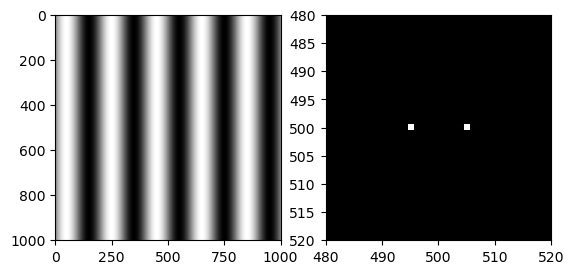

In [5]:
import scipy as sp

# Calculate Fourier transform of grating
grate = grating(200, 0)
ft = sp.fft.ifftshift(grate)   # shifts zero frequency to center of k range
ft = sp.fft.fft2(ft)           # compute FT
ft = sp.fft.fftshift(ft)       # reverse shift

# Plot grating
plt.set_cmap("gray")
plt.subplot(121)
plt.imshow(grate)

# Plot transform
plt.subplot(122)
plt.imshow(abs(ft))
plt.xlim([480, 520])
plt.ylim([520, 480])  # Order is reversed for y because fft2() flips quadrants
plt.show()

We see that for a *vertically*-oriented grating with `wavelength` = `200`, the FFT appears as just two (*horizontally*-offset) points, at $x = 500 - 5$ and $x = 500 + 5$.  That is, the only $C_{kl}$ terms from Eq. (9) that are nonzero have one particular $k$ value and its "mirror-image partner" (as in Figure 8).  

The particular value of $k$ is determined by the spatial frequency of the grating.  Inspecting Eq. (9), or its cosine version Eq. (1), we see that we're matching $\cos(2\pi kx/N)$ from those equations to data of the form $\cos(2\pi x/\lambda$) from the `grating()` function.  Therefore, $k/N = 1/\lambda$, or $k = N/\lambda$.  Since our grating was created with $N = 1000$ points, and $\lambda = $ `wavelength` $= 200$, we get $k = 5$.  There's just one coefficient in the FT because the grating pattern is a pure cosine consisting of a single wavelength.   

The brightness of the points is proportional to the magnitude of the coefficient $C_{kl}$.  

Comments on the code above:
- The function calls to `sp.fft.ifftshift()` and its inverse `sp.fft.fftshift()` have the effect of shifting the FT so that the coefficient corresponding to zero frequency, i.e. the constant component of the input ($C_{00}$ in Eq. (9)), appears in the center of the FT.  (Python's default is to put that point in the upper-right corner of the array that's output by the FFT function.) 
- The y-axis limits are reversed in the `plt.ylim()` call because the frequency shifts also swap the 1st and 3rd quadrants as well as the 2nd and 4th.  
- See the reference provided at the top of this section for more information on both these technical points. 
- The absolute value of the FT was plotted with `plt.imshow()` because the output of the FT function is complex and only real values can be plotted.

<font color="green"><b>Breakpoint 5</b></font>: Predict where the two white points will appear if `wavelength` is changed to `100`, and briefly explain.  Then rerun the code cell above with `wavelength` = `100` to check your prediction.

Return `wavelength` to `200` in the code cell above and change the angle to `np.pi/2`.  This rotates the grating by $\pi/2$ radians, or $90^\circ$, counterclockwise.  Note what happens to the white dots.  [Now they represent different $l$ values in Eq. (9), rather than different $k$ values.]

Repeat for `angle` = `np.pi/4` = $45^\circ$.  Note that in this case the dots get blurry because we're working with a discrete lattice of ($k, l$) points, not a continuous plane.  Since the distance of each white point from the center of the image should be $5$ units (because `wavelength` = `200` so $k = 5$), but there is no ($k, l$) lattice point at that distance from the center along a $45^\circ$ line (where $k$ and $l$ would each be $5/\sqrt{2} \approx 3.54$), *multiple* $C_{kl}$ coefficients with ($k, l$) values *near* ($k\approx3.54, l\approx3.54$) come into play.

Now let's create a pair of superimposed gratings $90^\circ$ apart and find the FT.  We will make the amplitude of the vertical grating $50\%$ larger that of the horizontal one, so that we can see the effect on the FT.  (Try to predict what you think it will look like.)

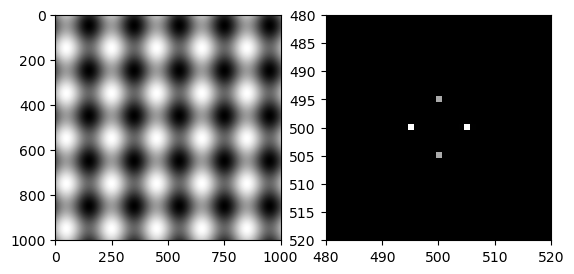

In [6]:
import scipy as sp
import numpy as np

# Calculate Fourier transform of grating
grate1 = 1.5 * grating(200, 0)        # original grating, 50% larger amplitude
grate2 = grating(200, np.pi/2)        # rotated grating
grateT = grate1 + grate2              # combine gratings
ft = sp.fft.ifftshift(grateT)         # shift zero frequency to center of k range
ft = sp.fft.fft2(ft)                  # compute FT
ft = sp.fft.fftshift(ft)              # reverse shift

# Plot grating
plt.set_cmap("gray")
plt.subplot(121)
plt.imshow(grateT)

# Plot transform
plt.subplot(122)
plt.imshow(abs(ft))
plt.xlim([480, 520])
plt.ylim([520, 480])  # Order is reversed for y because fft2() flips quadrants
plt.show()

Here we see that the horizontally-offset dots in the FT are brighter than the vertically-offset ones, representing the greater amplitude of the vertically-aligned grating.

This and the previous plots show that features that vary horizontally across the image will create FT dots along the $x$ direction, while features that vary vertically will create FT dots along the $y$ direction.  

An arbitrary image can be thought of as composed of gratings of varying amplitudes and wavelengths oriented at many different angles.  The resulting 2-D FT captures all that information in the amplitudes and positions (in the $k$-$l$ plot) of the FT points.

We can reproduce the original image from its Fourier transform using the inverse FT.  This requires repeating the same frequency shifts that were used in computing the FT (with functions `sp.fft.ifftshift()` and `sp.fft.fftshift()`), and then taking the real part of the elements of the resulting array.  We also need to reverse the direction of the y axis, as was done above.

**NOTE**: Make sure to run the code cell above each time before running the next one.

(1000.0, 0.0)

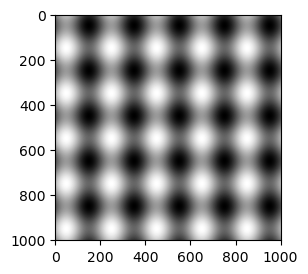

In [5]:
fts = sp.fft.ifftshift(ft)
orig = sp.fft.ifft2(fts)        # inverse FT
orig = sp.fft.fftshift(orig)    
orig = orig.real                # real parts of elements

plt.subplot(121)
plt.imshow(orig, aspect='equal')
plt.xlim([0, 1000])
plt.ylim([1000, 0]) 

This looks identical to the original image, as we'd hope.

Now, suppose we eliminate the top and bottom points in the FT of the combination grating... what should the inverse FT of the new FT be?

Since those points contain the information about the horizontally-aligned grating, we should get back just the vertically-aligned grating.  Let's check that out!

First, we'll remove those points and display the resulting FT, to make sure it's what we want:

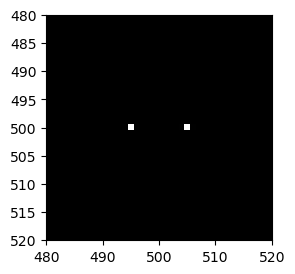

In [6]:
ft1 = ft                # FT of combination grating

ft1[0:500, :] = 0       # zero out rows below 500th
ft1[501:, :] = 0        # zero out rows above 500th

# Plot resulting FT
plt.subplot(121)
plt.imshow(abs(ft1))
plt.xlim([480, 520])
plt.ylim([520, 480])  # Order is reversed for y because fft2() flips quadrants
plt.show()

Looks good.  Now we do the frequency shifts, compute the inverse FT, and plot the result:

(1000.0, 0.0)

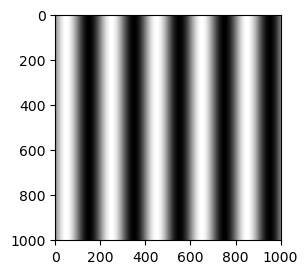

In [7]:
ft1s = sp.fft.ifftshift(ft1)      # shift zero frequency to center of k range
new = sp.fft.ifft2(ft1s)          # inverse FT
new = sp.fft.fftshift(new)        # reverse frequency shift
new = new.real                    # real parts of elements, for plotting

plt.subplot(121)
plt.imshow(new, aspect='equal')
plt.xlim([0, 1000])
plt.ylim([1000, 0]) 

That's a match for the original grating (with 1.5x the original amplitude, which isn't apparent from the plot)!

Now let's try a FT of an actual photograph, which we'll call the "columns image."  We can import the image using the ***`imread()`*** function from `matplotlib`'s `image` subpackage.  The image will consist of separate color layers representing the intensities of red, green, and blue colors in each pixel.  We write a simple function (`rgb2gray()`) that uses a standard formula to convert the red, green, and blue components of the image into shades of gray.  (There are several formulas; for our purposes it doesn't matter which we use.  In this one, the red values are multiplied by 0.299, green values are multiplied by 0.587, blue values are multiplied by 0.114, and the results are added.  In the resulting image, the pixel values range from 0 (black) to 255 (white), which is the standard range for grayscale images.)  We then do the same frequency shift, FFT, and inverse frequency shift as above.  Below the code cell, the grayscale image and its FT are shown.

Dimensions of image: (450, 306)


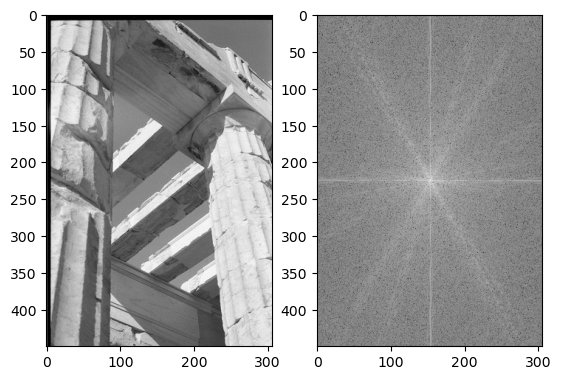

In [7]:
from matplotlib import image
from numpy import log

img = image.imread("Images\Structure.jpg")

# Function to convert color data to grayscale
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

imgg = rgb2gray(img)                 # apply color conversion function
print(f"Dimensions of image: {imgg.shape[0], imgg.shape[1]}")

ftb = sp.fft.ifftshift(imgg)         # shifts zero frequency to center of k range
ftb = sp.fft.fft2(ftb)               # FFT
ftb = sp.fft.fftshift(ftb)           # inverse frequency shift
ftbr = ftb.real                      # take real part of FFT output, for plotting

# Plot image
plt.set_cmap("gray")
plt.subplot(121)
plt.imshow(imgg)

# Plot transform
plt.subplot(122)
plt.imshow(log(abs(ftbr)), aspect='equal')


Note that in the code cell above, the `log` of the FT is displayed.  That is necessary because the image, being a complicated one, involves lots of Fourier coefficients spanning a wide range of magnitudes.  Without using `log`, it turns out that the central bright dot would overwhelm all the others, making them invisible on the intensity scale of the image.  

We see in the FFT a set of radial lines that are brighter than the background.  To get an understanding of what these represent, let's "mask" a feature in the FT.  We will set the points with $k = 225$ (corresponding to the horizontal midline) equal to zero, then find the inverse FT.  (Note: when blacking out this middle row, we need to leave the dots right near the center unchanged.  They represent the zero-frequency component of the image, which corresponds to the average pixel intensity.  Blacking them out would result in a inverse transformed image that's very dark.  You can check that for yourself; just make sure to rerun the code cell above before running the next one, so that `ftb` is properly defined.  Also note that in blacking out the midline the values are set to a small number, 0.01, rather than to 0, because otherwise the `log` taken in the first call to `plt.imshow()` will give an error, since $\log(0) = -\infty$.)

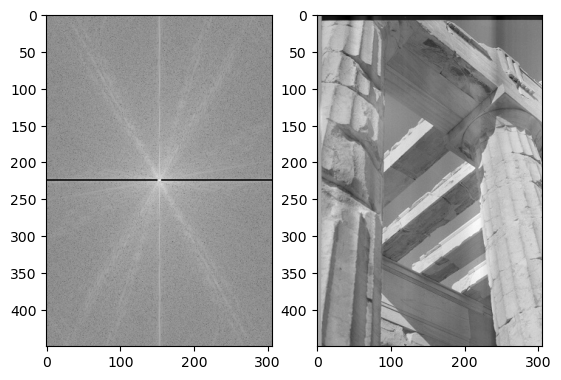

In [9]:
ftbm = ftb
ftbm[224:226, 0:151] = 0.01           # black out left half of middle row, pixels with l < 150 
ftbm[224:226, 156:] = 0.01            # black out right half of middle row, pixels with l > 155

# Plot transform
plt.subplot(121)
plt.imshow(log(abs(ftbm)), aspect='equal')

ftbm = sp.fft.ifftshift(ftbm)         # shifts zero frequency to center of k range
ftbm = sp.fft.ifft2(ftbm)             # inverse transform
ftbm = sp.fft.fftshift(ftbm)          # inverse frequency shift
ftbmr = ftbm.real                     # real part, for plotting

# Plot inverse transform
plt.subplot(122)
plt.imshow(ftbmr, aspect='equal')


Comparing the reconstructed "columns image" with the original one, we can see that the vertical columns (as well as the dark border on the left-hand side of the original image) are fainter or somewhat "washed out" now.  The horizontal midline of the FT represents vertically-oriented information in the image (just as the horizontally-offset dots represent the information about the vertical grating in its FT).  By zeroing out that horizontal midline, we have removed some of the information about the vertically-aligned features.

Notice in the reconstructed image that there also are some spurious artifacts added in: there's a short, dark vertical "bar" above the right-hand column, and a light region to the left of that bar.  These kinds of artifacts are common in images (and other data) reconstructed from inverse Fourier transforms of filtered Fourier transforms.

### <font color="blue">**Recap**</font>

* A Fourier series can be used to represent a periodic function.  The symmetry of the functions used in the series should match that of the function being approximated (if it has symmetry).  
<br>

* The discrete Fourier transform provides a way to numerically compute the coefficients of a finite series representation of a function, and can be used to model discretely sampled data.  
<br>

* The frequency at which data samples are acquired determines how accurately the underlying function can be modeled, as explained by the sampling theorem and as seen in the phenomenon of aliasing.  
<br>

* The Fast Fourier Transform is an elegant and highly efficient algorithm for finding the transform of discrete data. 
<br>

* Images can be analyzed and altered with 2-D Fourier transforms.  Removing features from the Fourier transform of an image and then performing the inverse Fourier transform can result in an altered version of the original image.  This can be used to deemphasize features in the image.

### <font color="blue">**Reflection Prompts**</font>

These questions are intended to help you think about what you learned from this module and how it might be useful to you in the future.  You are strongly encouraged to answer them before moving on to the next module.

*  Which components of this module did you find you were easily able to work through, and why do you think they were especially easy for you? 

*  Which components of this module did you find more difficult to work through, and why do you think they were challenging?

*  When you got stuck, what did you do to get unstuck?  Could this or similar actions be helpful if you get stuck in future work?

*  What do you understand more deeply about this material?

*  What questions or uncertainties remain for you regarding this material?

### <font color="blue">Exercises</font>

<u>**Exercise #1**</u>  
In order to have a simple function on which to test Fourier transform routines, write a program to return data representing a square wave having its left edge at the origin of the $x$-axis.  Let the amplitude of the square wave be $h$, and its width be $w$, and let it be flanked on each side by a region of width $w$ and zero amplitude.  Thus, the entire function should extend from $x = -w$ to $x = +2w$, but it should be nonzero only in the range from $0$ to $w$.  Use  $1024$ ($= 2^{10}$) points in your construction of the square wave (including the zero regions).  Your program should plot the square wave, to prove that your code works as it should.  Test it by creating and plotting a square wave with height $1.0$ and width $0.5$.  
<br>


<u>**Exercise #2**</u>  
(a) Apply the first (non-vectorized) DFT function presented in the module to your square wave function using the height and width of Exercise \#1, and make two plots of the output: one showing all of the data and another showing just the first $20$ values.  (It's useful to plot the data as large dots, using the 'o' argument to the `plot` function.)  Briefly describe and interpret the results. 

(b) Modify the first DFT function so that it computes *all* of the `c[k]` coefficients, including those with $k > \tfrac{1}{2} N$.  (The `numpy` function to compute a complex conjugate comes from the `numpy.ma` library and is called ***`conjugate()`***.) Run it and the vectorized version on the square wave data, and plot the two results (on separate graphs; as small dots, using '.').  To determine whether or not they're the same, plot the difference between them (on a third graph), and also use `numpy`'s ***`allclose()`*** function, which returns `True` if corresponding elements of two arrays are the same to within some small tolerance.  (See the documentation for `numpy.allclose` for information on how to use it and on the default tolerances; other values may be provided by the user as arguments passed to the function).  Do the results agree with each other?  

(c) Using `numpy`'s `linspace` function, create sine wave data in the range (0, $2\pi$) using $1000$ data points, run your "full" or vectorized DFT function on it, and plot the first $10$ values.  Do the same for sine wave data in the range (0, $4\pi$), again with $1000$ data points.  Explain the two graphs. }

(d) Finally, run `scipy`'s `fft` function (from the `scipy.fft` library) on your square wave and on the first sine wave of (c) to check whether its outputs are the same as those from our DFT functions.  
<br>


<u>**Exercise #3**</u>  
To show the superior speed of `scipy`'s `fft()` function, apply it, the nonvectorized DFT routine you used in Exercise \#2, and the vectorized DFT routine, to your square wave.  Time how long it takes each function/routine to perform the Fourier transform by using the `timeit` magic [e.g., `%timeit fft(square)`].  How do the times compare (pay attention to the units)?  
<br>
    
	
<u>**Exercise #4**</u>  
Import the sound data in the file `piano.txt`, which you should find where the modules are posted.  You will need to upload it to the directory in which you are running your notebook, and then read it into a variable using the syntax `sound = numpy.loadtxt('piano.txt')`, where "`sound`" is the variable name.  (a) Plot the data in this file.  (b) Now run `scipy`'s `fft()` function on the data, storing the Fourier transform output and plotting it as well.  You should see two large spikes, as well as several small ones (all in a symmetric pattern).  (c) Copy the data from the Fourier transform output to a new array, and change that new array so that the data points in the range 2001-98000 have the value 0: this will eliminate most of the smaller spikes in the Fourier transform.  Plot the new array to confirm this.  (d) Apply the reverse transform `ifft` to this new array, and plot the result.  How does it compare to the original `piano` plot?  Explain any differences you observe.  (e) Run the notebook `Soundfile_Player.ipynb` from the directory where the modules are posted.  It will produce audio players that you can run to play the original sound file and the one with the small spikes eliminated.  How do they compare?  Explain any differences you hear.  How does this mesh with what you observed in the plots of those files?   
<br>


<u>**Exercise #5**</u>  
Suppose that instead of making the columns in the columns image fainter, we want to make the beams that run diagonally from lower left to upper right fainter.  Modify the code in the last cell to make that happen.  
<br>  
  
  
<u>**Exercise #6**</u>  
Adapt the code above to mask (i.e., set equal to 0.01) the pixels in the FFT of the "columns image" that lie within a distance of 25 pixels from the FFT center, then inverse-transform that FFT.  Describe the resulting image and explain how and why it differs from the original "columns image."


### <font color="blue">Breakpoint Answers</font>

**Breakpoint 1**  
The cosine sum starts with $k = 0$ because cos(0) is not zero.  However, $\sin(0) = 0$, so there is no point in including the $k = 0$ term in that sum.  
<br>


**Breakpoint 2**  
From Eq. (5), we're interested in the integral $\int_0^L \exp \left[ i 2 \pi (k'-k) x/L \right] \text{d}x$.  If $k' = k$, the integrand becomes $e^0 = 1$, and so the integral gives $L$ immediately.  If $k' \ne k$, the integral can be computed as follows:

$$\int_0^L \exp \left[ i \frac{2 \pi (k'-k) x}{L} \right] \text{d}x = \dfrac{L}{2i \pi (k'-k)} \exp \left[ i \frac{2 \pi (k'-k) x}{L} \right]_0^L = \dfrac{L}{2i\pi (k'-k)} \left[ e^{2i\pi (k'-k)}  - 1 \right].$$

Since $k' \ne k$, then the first term in square brackets is $\exp(2i\pi n)$, where $n$ is an integer, and this just equals one (it corresponds to being at angle 0 on the unit circle in the complex plane).  Thus, the combination of terms in square brackets vanishes.  
<br>


**Breakpoint 3**  
(a) For $N = 7$, $\tfrac{1}{2} (N + 1) = 4$, while `N//2 + 1 = 7//2 + 1 = 3 + 1 = 4` after rounding down the fraction.  (b) For $N = 8$, $\tfrac{1}{2} N + 1 = 5$, and `N//2 + 1 = 8//2 + 1 = 4 + 1 = 5`.  In both cases, the results agree.  
<br>


**Breakpoint 4**  
A wave with period $T$ has a frequency $f = 1/T$.  For the Nyquist frequency to match that frequency, we require $1/T = 1/2\Delta$, or $\Delta = T/2$.  Thus, the wave must be sampled at half the period, or twice per cycle --- if it's sampled at one peak, it will be sampled at all of the other peaks and troughs.  By the way, this is why digital audio usually is sampled at around 44 Mhz or higher: this is a high enough sample rate to accurately detect sound frequencies of 22 Hz, which is at the upper limit of normal human hearing.  
<br>


**Breakpoint 5**  
The $k$ values of the Fourier coefficients are inversely related to the periodicity $L$ of the function being modeled, so if $L$ decreases by a factor of 2, the $k$ values of the coefficients will increase by that factor.  Therefore, the white dots should appear at $x = 500 - (5 \times 2) = 500 - 10$ and $x = 500 + (5 \times 2) = 500 + 10$.  This is what the plot shows.

### <font color="blue">References</font>

$^1$ Module adapted from *Computational Physics* by M. Newman.

$^2$ E.g., *Mathematical Methods in the Physical Sciences*, by Mary Boas.

$^3$ This discussion is adapted from *A Survey of Computational Physics*, by Landau, Paez and Bordeianu.
